<a href="https://colab.research.google.com/github/Navyam-Raushan/Machine-Learning-Models/blob/main/dog_breed_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle c download dog-breed-identification

100% 689M/691M [00:33<00:00, 16.8MB/s]
100% 691M/691M [00:33<00:00, 21.7MB/s]


In [5]:
# Run this code only when runtime is restarted
! unzip "dog-breed-identification.zip" -d "dog-breed-identification"

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed-identification/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed-identification/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed-identification/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed-identification/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed-identification/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed-identification/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed-identification/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed-identification/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed-identification/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed-identification/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed-identification/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed-identificatio

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)
print(hub.__version__)

2.17.1
0.16.1


In [8]:
labels = pd.read_csv("dog-breed-identification/labels.csv")
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


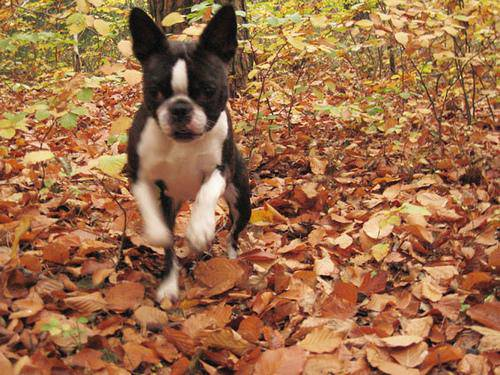

In [9]:
# The name format of the image is --
from IPython.display import Image
Image(filename="dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

# so filenames format is label[id].jpg

In [10]:
filenames = ["dog-breed-identification/train/" + fname + ".jpg" for fname in labels["id"]]
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

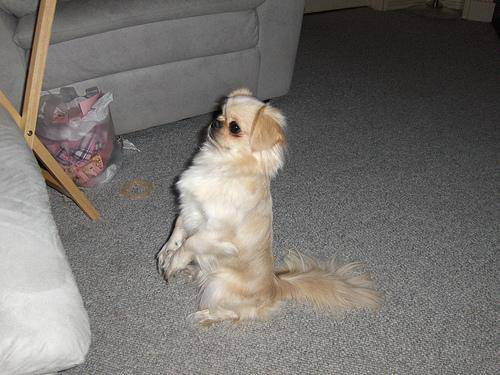

In [11]:
Image("dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg")

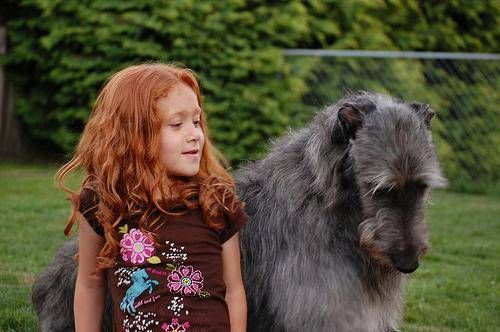

In [12]:
Image(filenames[9])

In [13]:
labels.loc[9]

,9
id,0042188c895a2f14ef64a918ed9c7b64
breed,scottish_deerhound


In [14]:
labels["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
komondor,67
brabancon_griffon,67


In [15]:
len(np.unique(labels["breed"]))


120

In [16]:
# need to convert labels["breed"] into boolean labels
boolean_labels = [np.unique(labels["breed"]) == label for label in labels["breed"]]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
boolean_labels[2].argmax()

85

In [18]:
# Move to train test split
import sklearn
from sklearn.model_selection import train_test_split

X = filenames
y = boolean_labels



In [19]:
len(X), len(y)

(10222, 10222)

In [20]:
NUM_IMAGES = 2000 #@param {type:"slider", min:1000, max:10000, step:1000}
X = X[:NUM_IMAGES]
y = y[:NUM_IMAGES]
len(X), len(y)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [21]:
len(X_train), len(X_val), len(y_train), len(y_val)

(1600, 400, 1600, 400)

# Image Preprocessing

In [22]:
def process_image(image):
  image = tf.io.read_file(image)
  image = tf.image.decode_jpeg(image, channels=3)

  # Normalisation
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[224, 224])

  return image

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label



In [23]:
process_image(X[4]), tf.constant(y[4])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3167367 , 0.33634454, 0.31281513],
         [0.3167367 , 0.33634454, 0.31281513],
         [0.3167367 , 0.33634454, 0.31281513],
         ...,
         [0.33333334, 0.3372549 , 0.31764707],
         [0.30077025, 0.33000705, 0.3019608 ],
         [0.29411766, 0.33333334, 0.3019608 ]],
 
        [[0.2992297 , 0.31883755, 0.29530814],
         [0.2992297 , 0.31883755, 0.29530814],
         [0.2992297 , 0.31883755, 0.29530814],
         ...,
         [0.33333334, 0.3372549 , 0.31764707],
         [0.3052871 , 0.32608548, 0.3019608 ],
         [0.3019608 , 0.32941177, 0.3019608 ]],
 
        [[0.30227593, 0.32188377, 0.29835436],
         [0.30227593, 0.32188377, 0.29835436],
         [0.30227593, 0.32188377, 0.29835436],
         ...,
         [0.33333334, 0.3372549 , 0.31764707],
         [0.30533493, 0.32603765, 0.3019608 ],
         [0.30227593, 0.32909665, 0.3019608 ]],
 
        ...,
 
        [[0.53057134, 0.5344929 

# Converting Data into Data batches

In [24]:
# Important function should not be done any mistakes.
def create_data_batches(X,
                        y=None,
                        batch_size=32,
                        valid_data=False,
                        test_data=False):
  if test_data:
    print("Creating Test Data Batch")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    print("creating validation data batch".title())
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("creating trainning data batch".title())
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.shuffle(buffer_size=len(X)).map(get_image_label).batch(batch_size)

    return data_batch


In [25]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creating Trainning Data Batch
Creating Validation Data Batch


In [26]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualising Data Batches

In [27]:
label = labels["breed"].to_numpy()
label[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [28]:
unique_breeds = np.unique(label)


In [29]:
def show_25_images(images, labels):
  plt.figure(figsize=(15, 12))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(unique_breeds[labels[i].argmax()])
    plt.tight_layout()
    plt.axis("off")



In [30]:
train_images, train_labels = next(train_data.as_numpy_iterator())

In [31]:
len(train_images), len(train_labels)

(32, 32)

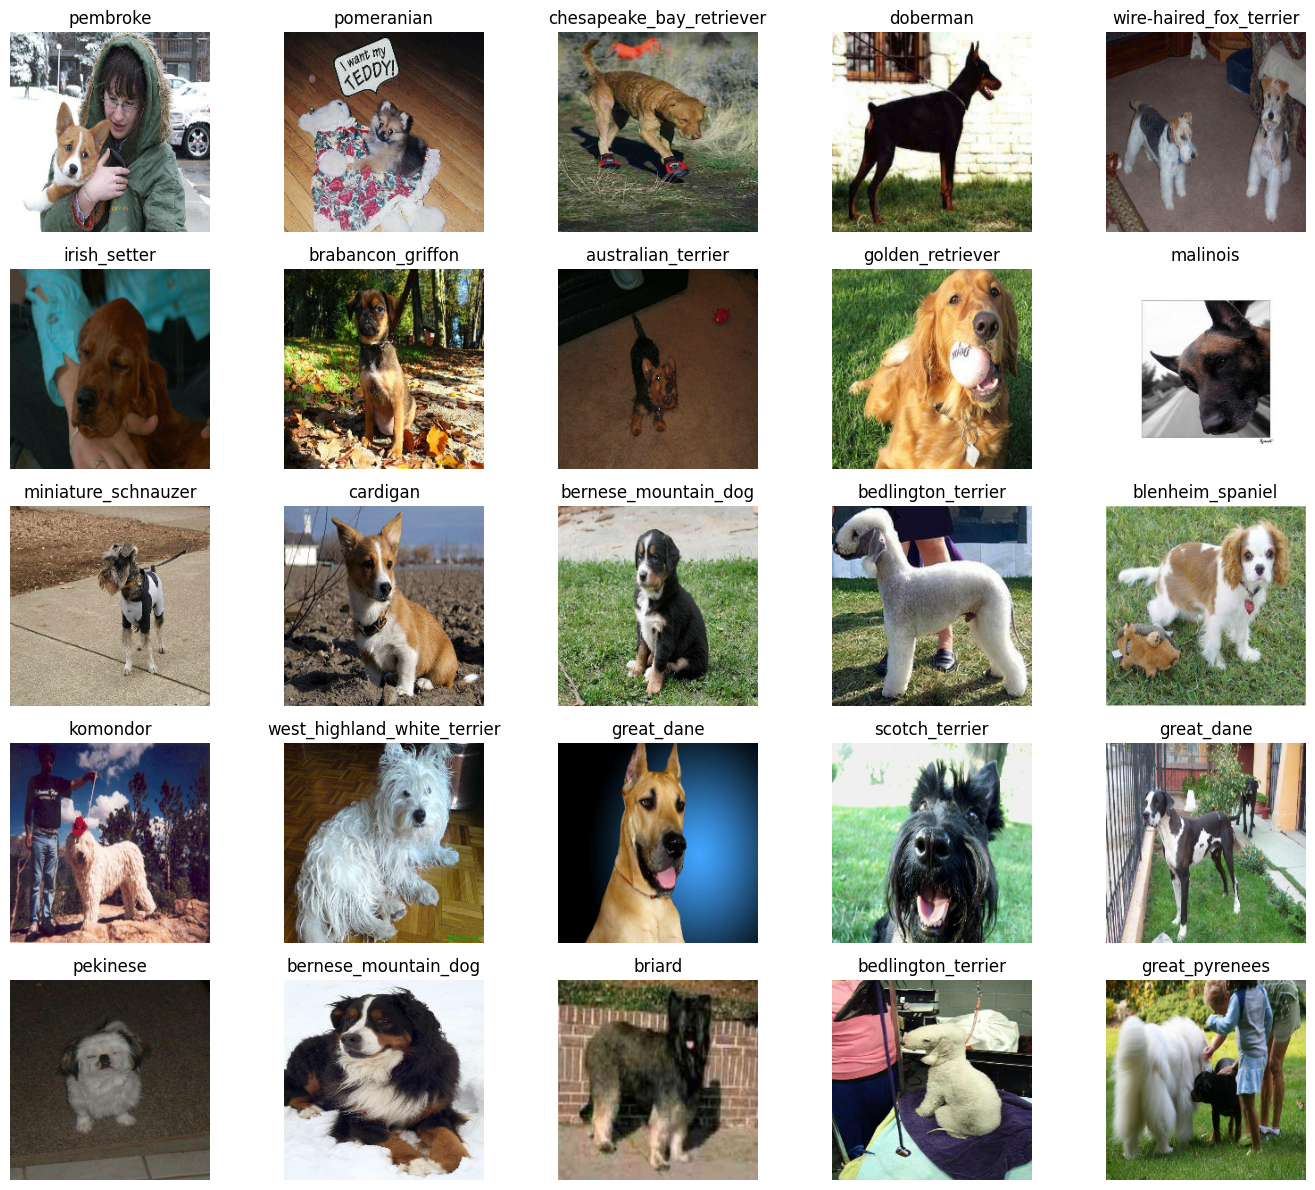

In [32]:
show_25_images(train_images, train_labels)

# Building and training the Model

In [43]:
# INPUT_SHAPE = [None, 224, 224, 3]
INPUT_SHAPE = (224,224)
OUTPUT_SHAPE = 120

# Trying with different model
MODULE_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-feature-vector/2"

In [48]:
import tf_keras as tfk
def create_model(input_shape=INPUT_SHAPE,
                 output_shape=OUTPUT_SHAPE,
                 module=MODULE_URL):
  print("Building Model with {}".format(module))
  predtrained_model_without_top_layer = tfk.Sequential([
  hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-feature-vector/2",
                 input_shape=INPUT_SHAPE+(3,), trainable=False)
                                                              ])

  model = tfk.Sequential([
      predtrained_model_without_top_layer,
      tfk.layers.Dense(120, activation="softmax")
  ])

  model.compile(loss="categorical_crossentropy",
                optimizer='adam',
                metrics=["accuracy"])

  return model


In [50]:
model = create_model()
model.summary()

Building Model with https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-feature-vector/2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 1792)              4363712   
                                                                 
 dense_1 (Dense)             (None, 120)               215160    
                                                                 
Total params: 4578872 (17.47 MB)
Trainable params: 215160 (840.47 KB)
Non-trainable params: 4363712 (16.65 MB)
_________________________________________________________________


In [51]:
%load_ext tensorboard

In [52]:
import datetime

def create_tensorboard_callback():
  """
  Creates a TensorBoard callback to store log files.
  """
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                      #  Make a log file with the current date and time.
                      )

  return tf.keras.callbacks.TensorBoard(logdir)

In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                        patience=4)

In [68]:
NUM_EPOCHS = 45 #@param {type:"slider", min:10, max:100}

In [58]:
print("GPU", "AVAILABLE" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU AVAILABLE


In [63]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [69]:
# tensorboard = create_tensorboard_callback()

model.fit(x=train_data,
          epochs=NUM_EPOCHS,
          validation_data=val_data,
          validation_freq=1,
          )



Epoch 1/45
50/50 [==============================] - 3s 68ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6870 - val_accuracy: 0.7800
Epoch 2/45
50/50 [==============================] - 5s 96ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6865 - val_accuracy: 0.7800
Epoch 3/45
50/50 [==============================] - 4s 79ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.6873 - val_accuracy: 0.7775
Epoch 4/45
50/50 [==============================] - 3s 69ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.6885 - val_accuracy: 0.7775
Epoch 5/45
50/50 [==============================] - 4s 81ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.6888 - val_accuracy: 0.7800
Epoch 6/45
50/50 [==============================] - 4s 80ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.6889 - val_accuracy: 0.7775
Epoch 7/45
50/50 [==============================] - 4s 80ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.6900 - val_accuracy: 0.7800
Epoch 8/45
50

# Insights after Training
- Even After changing the pretrained model
- We acheive accuracy of 78% with 20 epochs as well as 45 epochs
- By this underlying Architecture we can achieve this much maximum accuracy <br> on validation data.
- Its better than Previous Model- From 70% imporoved to 78%.